# import datasets and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
liver_df = pd.read_csv('liver_patient.csv')
liver_df.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [3]:
liver_df.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

# visualization

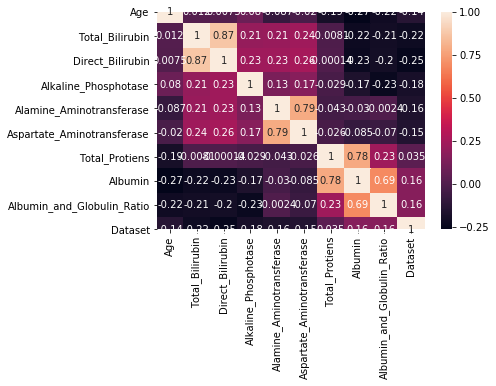

In [4]:
sns.heatmap(liver_df.corr(),annot=True)

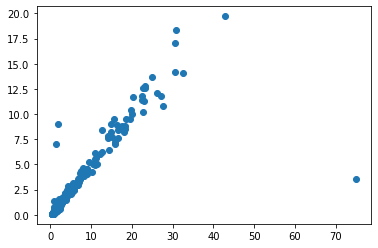

In [5]:
plt.scatter(liver_df['Total_Bilirubin'],liver_df['Direct_Bilirubin'])

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


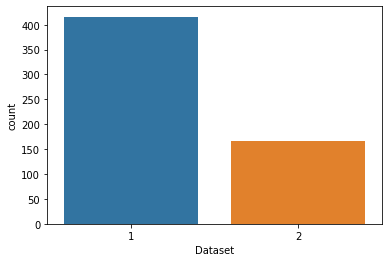

In [6]:
sns.countplot(data=liver_df, x = 'Dataset', label='Count')

LD, NLD = liver_df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

# deleting null values

In [7]:
liver_df['Albumin_and_Globulin_Ratio'] = liver_df['Albumin_and_Globulin_Ratio'].fillna(value=liver_df['Albumin_and_Globulin_Ratio'].mean())

In [8]:
liver_df.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio    False
Dataset                       False
dtype: bool

# seperating x and y

In [9]:
x=liver_df.iloc[:,0:10].values
x

array([[65, 'Female', 0.7, ..., 6.8, 3.3, 0.9],
       [62, 'Male', 10.9, ..., 7.5, 3.2, 0.74],
       [62, 'Male', 7.3, ..., 7.0, 3.3, 0.89],
       ...,
       [52, 'Male', 0.8, ..., 6.4, 3.2, 1.0],
       [31, 'Male', 1.3, ..., 6.8, 3.4, 1.0],
       [38, 'Male', 1.0, ..., 7.3, 4.4, 1.5]], dtype=object)

In [10]:
y=liver_df.iloc[:,10:].values
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [2],
    

# label encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
x[:,1]=lb.fit_transform(x[:,1])

In [12]:
x[0,:]

array([65, 0, 0.7, 0.1, 187, 16, 18, 6.8, 3.3, 0.9], dtype=object)

# model building

## logistic regression

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2 ,random_state=0)


In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [16]:
from joblib import dump
dump(sc,'scaler.save')

['scaler.save']

In [17]:
logreg = LogisticRegression()

In [18]:
logreg.fit(x_train, y_train)

C:\python\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
import pickle
pickle.dump(logreg,open('decision.pk1','wb'))

In [20]:
logreg_score = round(logreg.score(x_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(x_test, y_test) * 100, 2)

In [21]:
log_predicted= logreg.predict(x_test)
logreg_score = round(logreg.score(x_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(x_test, y_test) * 100, 2)

In [22]:
accuracy_score(y_test,log_predicted)

0.7008547008547008

In [23]:
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))

Confusion Matrix: 
 [[74  4]
 [31  8]]


In [24]:
print('Classification Report: \n', classification_report(y_test,log_predicted))

Classification Report: 
               precision    recall  f1-score   support

           1       0.70      0.95      0.81        78
           2       0.67      0.21      0.31        39

    accuracy                           0.70       117
   macro avg       0.69      0.58      0.56       117
weighted avg       0.69      0.70      0.64       117

